In [1]:
%matplotlib notebook

import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'D'), ('C', 'E'), ('E', 'D'), ('D', 'G'), ('E', 'G'), ('G', 'F')])

<IPython.core.display.Javascript object>


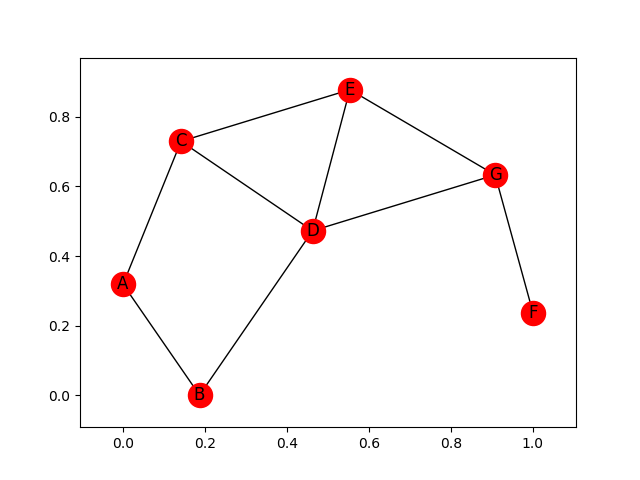

In [2]:
nx.draw_networkx(G)

In [16]:
T = nx.bfs_tree(G, 'A')

In [25]:
#nx.draw_networkx(T)

In [19]:
nx.shortest_path_length(T,'A')

{'A': 0, 'B': 1, 'C': 1, 'D': 2, 'E': 2, 'F': 4, 'G': 3}

In [20]:
nx.diameter(G)

4

In [21]:
nx.radius(G)

2

In [22]:
nx.eccentricity(G)

{'A': 4, 'B': 3, 'C': 3, 'D': 2, 'E': 2, 'F': 4, 'G': 3}

In [23]:
nx.periphery(G)

['A', 'F']

In [24]:
nx.center(G)

['D', 'E']

In [5]:
degCent = nx.degree_centrality(G)
degCent['D']

0.6666666666666666

In [6]:
closeCent = nx.closeness_centrality(G)
closeCent['G']

0.6

In [7]:
btwnCent = nx.betweenness_centrality(G, normalized = True, endpoints = False)

In [8]:
import operator

In [10]:
sorted(btwnCent.items(), key=operator.itemgetter(1), reverse = True)[0:5]

[('D', 0.38888888888888884),
 ('G', 0.3333333333333333),
 ('C', 0.18888888888888888),
 ('E', 0.1111111111111111),
 ('B', 0.07777777777777777)]

In [12]:
btwnCent_edge = nx.edge_betweenness_centrality(G, normalized=False)
sorted(btwnCent_edge.items(), key=operator.itemgetter(1), reverse = True)[0:5]

[(('D', 'G'), 6.333333333333333),
 (('G', 'F'), 6.0),
 (('B', 'D'), 5.666666666666667),
 (('A', 'C'), 4.333333333333333),
 (('E', 'G'), 3.6666666666666665)]

<IPython.core.display.Javascript object>


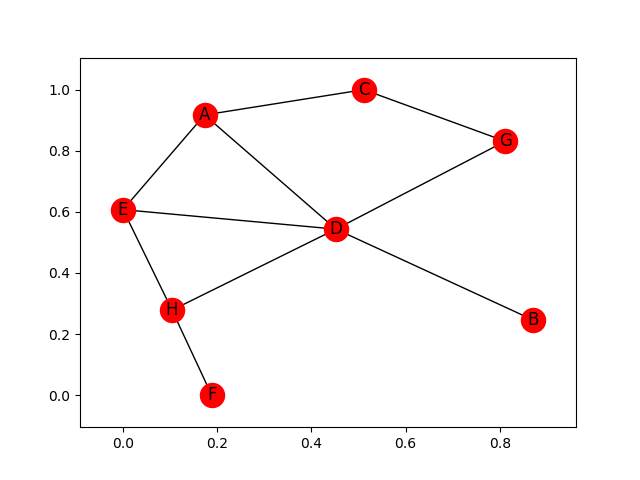

In [1]:
%matplotlib notebook

import networkx as nx
import matplotlib.pyplot as plt
G2 = nx.Graph()
G2.add_edges_from([('A', 'C'), ('A', 'D'), ('A', 'E'), ('C', 'G'), ('G', 'D'), ('D', 'B'), ('D', 'H'), ('D', 'E'), ('E', 'H'),('H', 'F')])
nx.draw_networkx(G2)

In [4]:
import operator
common_neigh = [(e[0], e[1], len(list(nx.common_neighbors(G2, e[0], e[1])))) for e in nx.non_edges(G2)]
sorted(common_neigh,key=operator.itemgetter(2), reverse = True)
print (common_neigh)

[('C', 'D', 2), ('C', 'E', 1), ('C', 'B', 0), ('C', 'F', 0), ('C', 'H', 0), ('D', 'F', 1), ('A', 'G', 2), ('A', 'H', 2), ('A', 'B', 1), ('A', 'F', 0), ('E', 'G', 1), ('E', 'B', 1), ('E', 'F', 1), ('G', 'H', 1), ('G', 'B', 1), ('G', 'F', 0), ('B', 'H', 1), ('B', 'F', 0)]


In [5]:
L = list(nx.jaccard_coefficient(G2))
L.sort(key=operator.itemgetter(2), reverse = True)
print(L)

[('A', 'G', 0.6666666666666666), ('A', 'H', 0.5), ('G', 'B', 0.5), ('C', 'D', 0.4), ('A', 'B', 0.3333333333333333), ('E', 'B', 0.3333333333333333), ('E', 'F', 0.3333333333333333), ('B', 'H', 0.3333333333333333), ('C', 'E', 0.25), ('E', 'G', 0.25), ('G', 'H', 0.25), ('D', 'F', 0.2), ('C', 'B', 0.0), ('C', 'F', 0.0), ('C', 'H', 0.0), ('A', 'F', 0.0), ('G', 'F', 0.0), ('B', 'F', 0.0)]


In [7]:
L1 = list(nx.resource_allocation_index(G2))
L1.sort(key=operator.itemgetter(2), reverse = True)
print(L1)

[('C', 'D', 0.8333333333333333), ('A', 'G', 0.7), ('A', 'H', 0.5333333333333333), ('C', 'E', 0.3333333333333333), ('D', 'F', 0.3333333333333333), ('E', 'F', 0.3333333333333333), ('A', 'B', 0.2), ('E', 'G', 0.2), ('E', 'B', 0.2), ('G', 'H', 0.2), ('G', 'B', 0.2), ('B', 'H', 0.2), ('C', 'B', 0), ('C', 'F', 0), ('C', 'H', 0), ('A', 'F', 0), ('G', 'F', 0), ('B', 'F', 0)]


In [9]:
L3 = list(nx.preferential_attachment(G2))
L3.sort(key=operator.itemgetter(2), reverse = True)
print(L3)

[('C', 'D', 10), ('A', 'H', 9), ('C', 'E', 6), ('C', 'H', 6), ('A', 'G', 6), ('E', 'G', 6), ('G', 'H', 6), ('D', 'F', 5), ('A', 'B', 3), ('A', 'F', 3), ('E', 'B', 3), ('E', 'F', 3), ('B', 'H', 3), ('C', 'B', 2), ('C', 'F', 2), ('G', 'B', 2), ('G', 'F', 2), ('B', 'F', 1)]


In [12]:
G2.node['A']['community'] = 0
G2.node['B']['community'] = 0
G2.node['C']['community'] = 0
G2.node['D']['community'] = 0
G2.node['G']['community'] = 0
G2.node['F']['community'] = 1
G2.node['E']['community'] = 1
G2.node['H']['community'] = 1
L4 = list(nx.cn_soundarajan_hopcroft(G2))
L4.sort(key=operator.itemgetter(2), reverse = True)
print(L4)

[('C', 'D', 4), ('A', 'G', 4), ('A', 'H', 2), ('A', 'B', 2), ('E', 'F', 2), ('G', 'B', 2), ('C', 'E', 1), ('D', 'F', 1), ('E', 'G', 1), ('E', 'B', 1), ('G', 'H', 1), ('B', 'H', 1), ('C', 'B', 0), ('C', 'F', 0), ('C', 'H', 0), ('A', 'F', 0), ('G', 'F', 0), ('B', 'F', 0)]


In [13]:
L5 = list(nx.ra_index_soundarajan_hopcroft(G2))
L5.sort(key=operator.itemgetter(2), reverse = True)
print(L5)

[('C', 'D', 0.8333333333333333), ('A', 'G', 0.7), ('E', 'F', 0.3333333333333333), ('A', 'B', 0.2), ('G', 'B', 0.2), ('C', 'E', 0), ('C', 'B', 0), ('C', 'F', 0), ('C', 'H', 0), ('D', 'F', 0), ('A', 'H', 0), ('A', 'F', 0), ('E', 'G', 0), ('E', 'B', 0), ('G', 'H', 0), ('G', 'F', 0), ('B', 'H', 0), ('B', 'F', 0)]
